In [1]:
import pandas as pd
df = pd.read_csv('NFR2_TWS.csv')
df.head(4)

,Time,Site Name,Point Machine Name,Direction,A Current,A Voltage,B Current,B Voltage,Type of A,Type of B,Polling of A,Polling of B
0,10-08-2024 6.19,NALBARI,PT-101/102,Reverse,"[0.0, 3.5, 3.8, 3.1, 2.5, 2.1, 1.9, 1.8, 1.9, ...","[0.0, 18.0, 40.5, 73.5, 90.0, 97.5, 102.0, 103...","[0.0, 4.3, 4.1, 3.3, 2.7, 2.3, 2.0, 2.1, 2.2, ...","[0.0, 18.0, 25.5, 64.5, 85.5, 96.0, 100.5, 103...",TWS,TWS,100,100
1,10-08-2024 6.20,NALBARI,PT-101/102,Normal,"[0.0, 3.0, 3.8, 3.0, 2.5, 2.1, 1.8, 1.7, 1.6, ...","[0.0, 49.5, 78.0, 93.0, 102.0, 106.5, 108.0, 1...","[0.0, 4.1, 3.9, 3.1, 2.5, 2.1, 1.8, 1.7, 1.7, ...","[0.0, 48.0, 76.5, 91.5, 100.5, 105.0, 108.0, 1...",TWS,TWS,100,100
2,10-08-2024 21.45,NALBARI,PT-101/102,Normal,"[0.0, 3.7, 3.6, 2.9, 2.4, 2.0, 1.8, 1.6, 1.6, ...","[0.0, 27.0, 63.0, 85.5, 97.5, 103.5, 106.5, 10...","[0.0, 1.1, 4.2, 3.7, 2.9, 2.4, 2.0, 1.8, 1.7, ...","[0.0, 25.5, 61.5, 84.0, 96.0, 103.5, 106.5, 10...",TWS,TWS,100,100
3,12-08-2024 10.29,NALBARI,PT-101/102,Reverse,"[0.0, 3.4, 3.9, 3.1, 2.6, 2.2, 1.9, 1.8, 1.9, ...","[0.0, 12.0, 54.0, 79.5, 94.5, 102.0, 105.0, 10...","[0.0, 4.2, 4.2, 3.4, 2.7, 2.3, 2.0, 2.0, 2.2, ...","[0.0, 12.0, 51.0, 78.0, 93.0, 100.5, 105.0, 10...",TWS,TWS,100,100


In [2]:
import numpy as np
import ast 

def extract_features(df):
    for col in ['A Current', 'A Voltage', 'B Current', 'B Voltage']:
        # Convert string lists to actual lists (if needed)
        df[col] = df[col].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

        df[f'{col} Mean'] = df[col].apply(np.mean)
        df[f'{col} Std'] = df[col].apply(np.std)
        df[f'{col} Max'] = df[col].apply(np.max)
        df[f'{col} Min'] = df[col].apply(np.min)
        df[f'{col} Range'] = df[col].apply(lambda x: np.max(x) - np.min(x))
        df[f'{col} Start'] = df[col].apply(lambda x: x[0] if len(x) > 0 else np.nan)
        df[f'{col} End'] = df[col].apply(lambda x: x[-1] if len(x) > 0 else np.nan)

    return df
# Usage
df = pd.read_csv("NFR2_TWS.csv") 
df = extract_features(df)


In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
df_features = extract_features(df)  

feature_cols = [col for col in df_features.columns if any(stat in col for stat in ['Mean', 'Std', 'Max', 'Min', 'Range', 'Start', 'End'])]
X = df_features[feature_cols]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=0)
df_features['Cluster'] = kmeans.fit_predict(X_scaled)


/Users/prathamhandique/Downloads/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [4]:
df_features.iloc[10:21][['Time', 'Site Name', 'Point Machine Name', 'Cluster']]

,Time,Site Name,Point Machine Name,Cluster
10,13-08-2024 22.35,NALBARI,PT-101/102,2
11,13-08-2024 22.40,NALBARI,PT-101/102,2
12,13-08-2024 22.40,NALBARI,PT-101/102,2
13,13-08-2024 23.05,NALBARI,PT-101/102,2
14,13-08-2024 23.14,NALBARI,PT-101/102,2
15,14-08-2024 12.20,NALBARI,PT-101/102,2
16,14-08-2024 12.34,NALBARI,PT-101/102,2
17,14-08-2024 15.00,NALBARI,PT-101/102,2
18,16-08-2024 3.57,NALBARI,PT-101/102,2
19,16-08-2024 4.04,NALBARI,PT-101/102,2


In [5]:
# See how many rows are in each cluster
df_features['Cluster'].value_counts()

2    4695
1    3343
0    1315
Name: Cluster, dtype: int64

In [6]:
# average values of each cluster
df_features.groupby('Cluster')[feature_cols].mean()

,A Current Mean,A Current Std,A Current Max,A Current Min,A Current Range,A Current Start,A Current End,A Voltage Mean,A Voltage Std,A Voltage Max,...,B Current Range,B Current Start,B Current End,B Voltage Mean,B Voltage Std,B Voltage Max,B Voltage Min,B Voltage Range,B Voltage Start,B Voltage End
Cluster,,,,,,,,,,,,,,,,,,,,,
0,2.253280,1.089464,4.833232,0.0,4.833232,0.0,0.0,108.267108,23.511270,117.993536,...,5.311483,0.0,0.0,106.134604,22.597385,116.478707,0.0,116.478707,0.0,0.0
1,2.458155,1.234073,5.827460,0.0,5.827460,0.0,0.0,107.948971,30.845886,121.383338,...,4.640981,0.0,0.0,109.461308,31.348110,122.873018,0.0,122.873018,0.0,0.0
2,2.068613,0.983816,4.157913,0.0,4.157913,0.0,0.0,107.452499,26.882714,118.759105,...,4.177721,0.0,0.0,107.428971,26.909722,119.068051,0.0,119.068051,0.0,0.0


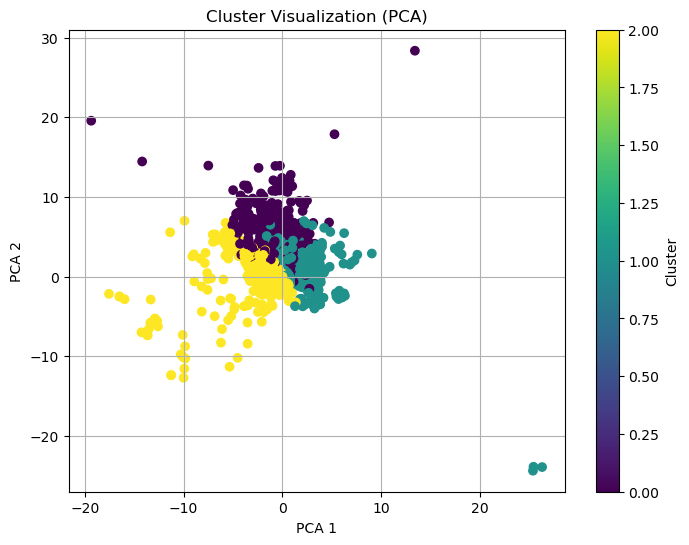

In [7]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_features['Cluster'], cmap='viridis')
plt.title('Cluster Visualization (PCA)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

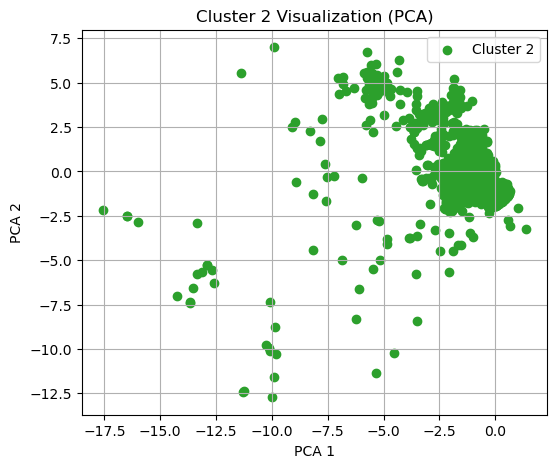

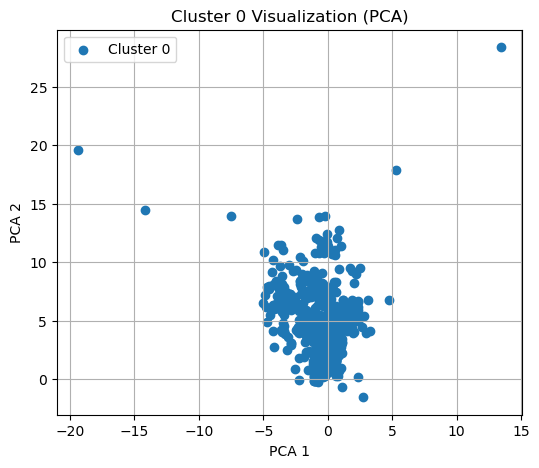

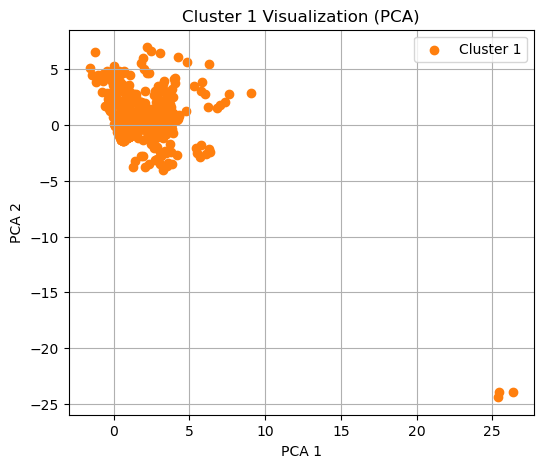

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# PCA already done
# X_pca = pca.fit_transform(X_scaled)

# Unique cluster labels
clusters = df_features['Cluster'].unique()

# Create a separate plot for each cluster
for cluster in clusters:
    cluster_mask = df_features['Cluster'] == cluster
    cluster_points = X_pca[cluster_mask]

    plt.figure(figsize=(6,5))
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c='C{}'.format(cluster), label=f'Cluster {cluster}')
    plt.title(f'Cluster {cluster} Visualization (PCA)')
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.legend()
    plt.grid(True)
    plt.show()


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the feature columns (exclude original raw data, if needed)
feature_cols = [col for col in df_features.columns if any(stat in col for stat in ['Mean', 'Std', 'Max', 'Min', 'Range', 'Start', 'End'])]

# Group by Cluster and calculate mean for each feature
cluster_summary = df_features.groupby('Cluster')[feature_cols].mean()

# Optional: normalize (z-score) across clusters to compare feature importance
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cluster_summary_scaled = pd.DataFrame(
    scaler.fit_transform(cluster_summary.T),
    index=cluster_summary.columns,
    columns=[f'Cluster {i}' for i in cluster_summary.index]
)


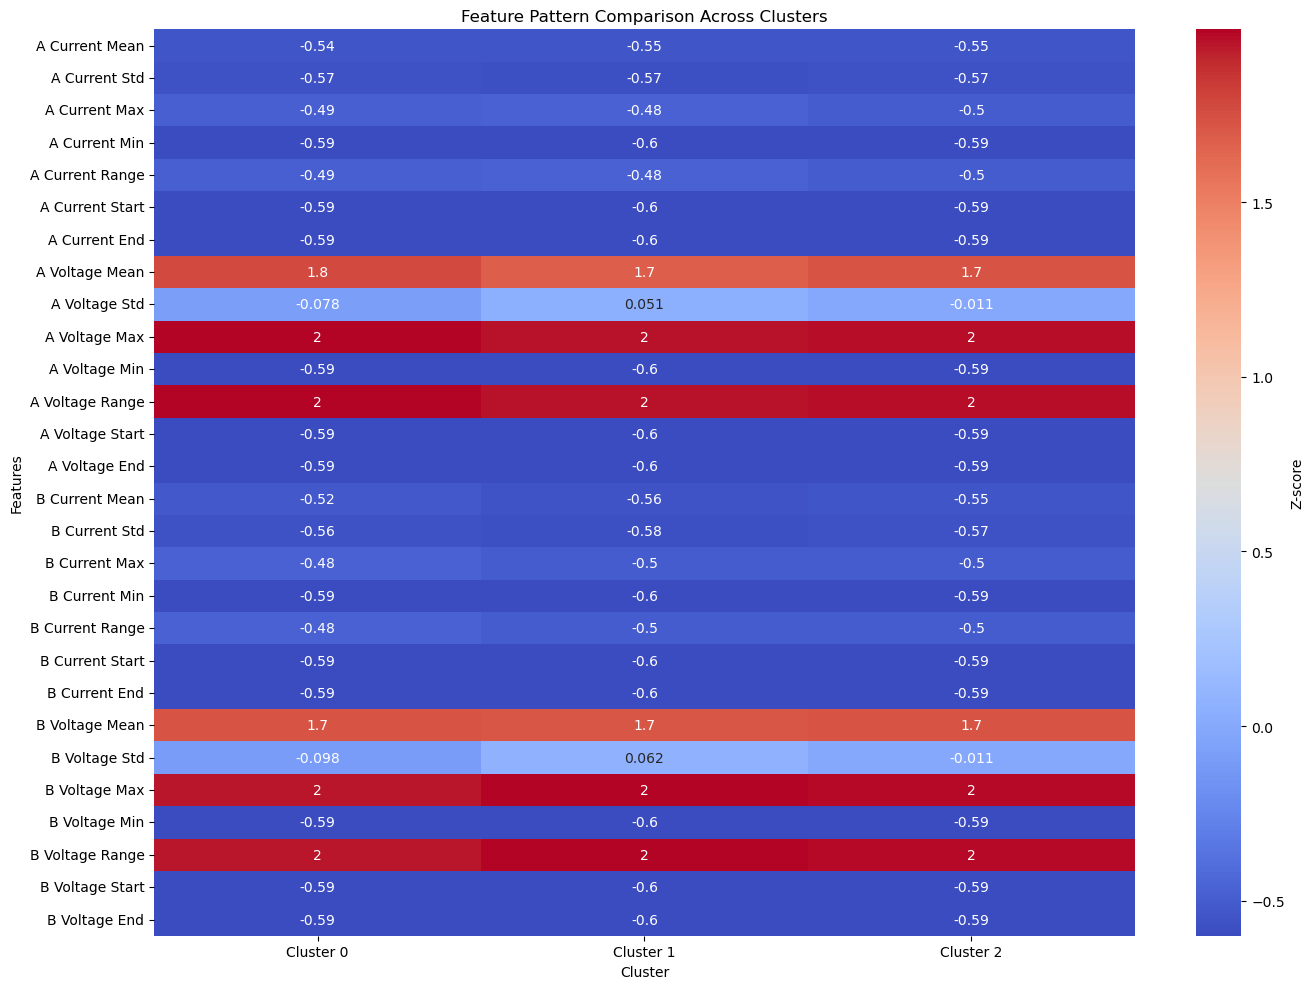

In [10]:
plt.figure(figsize=(14, 10))
sns.heatmap(cluster_summary_scaled, annot=True, cmap='coolwarm', cbar_kws={'label': 'Z-score'})
plt.title('Feature Pattern Comparison Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


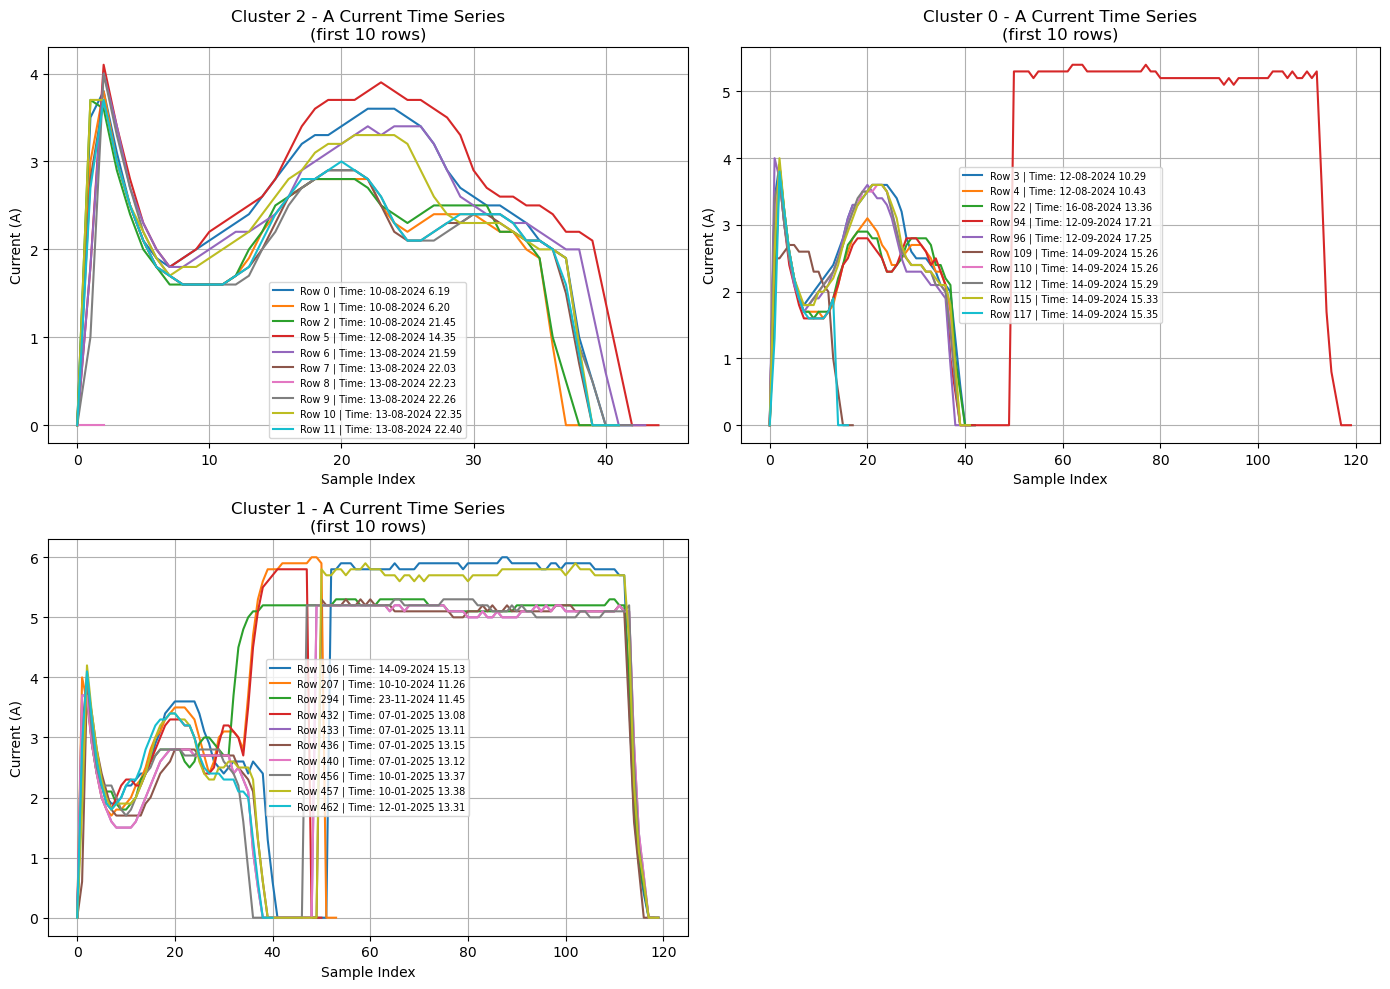

In [20]:
import matplotlib.pyplot as plt

# Number of samples from each cluster to plot
samples_per_cluster = 10

# Get unique cluster values (limit to 4 for a 2x2 grid)
clusters = df_features['Cluster'].unique()[:4]

# Create 2x2 subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.flatten()

# Plot each cluster in a subplot
for i, cluster in enumerate(clusters):
    ax = axs[i]
    
    # Get first N samples from this cluster
    cluster_data = df_features[df_features['Cluster'] == cluster].head(samples_per_cluster)

    for idx, row in cluster_data.iterrows():
        current = row['A Current']  # or 'B Current'
        ax.plot(current, label=f"Row {idx} | Time: {row['Time']}")

    ax.set_title(f'Cluster {cluster} - A Current Time Series\n(first {samples_per_cluster} rows)')
    ax.set_xlabel('Sample Index')
    ax.set_ylabel('Current (A)')
    ax.grid(True)
    ax.legend(fontsize=7)

# Hide any extra subplots if fewer than 4 clusters
for j in range(i+1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()


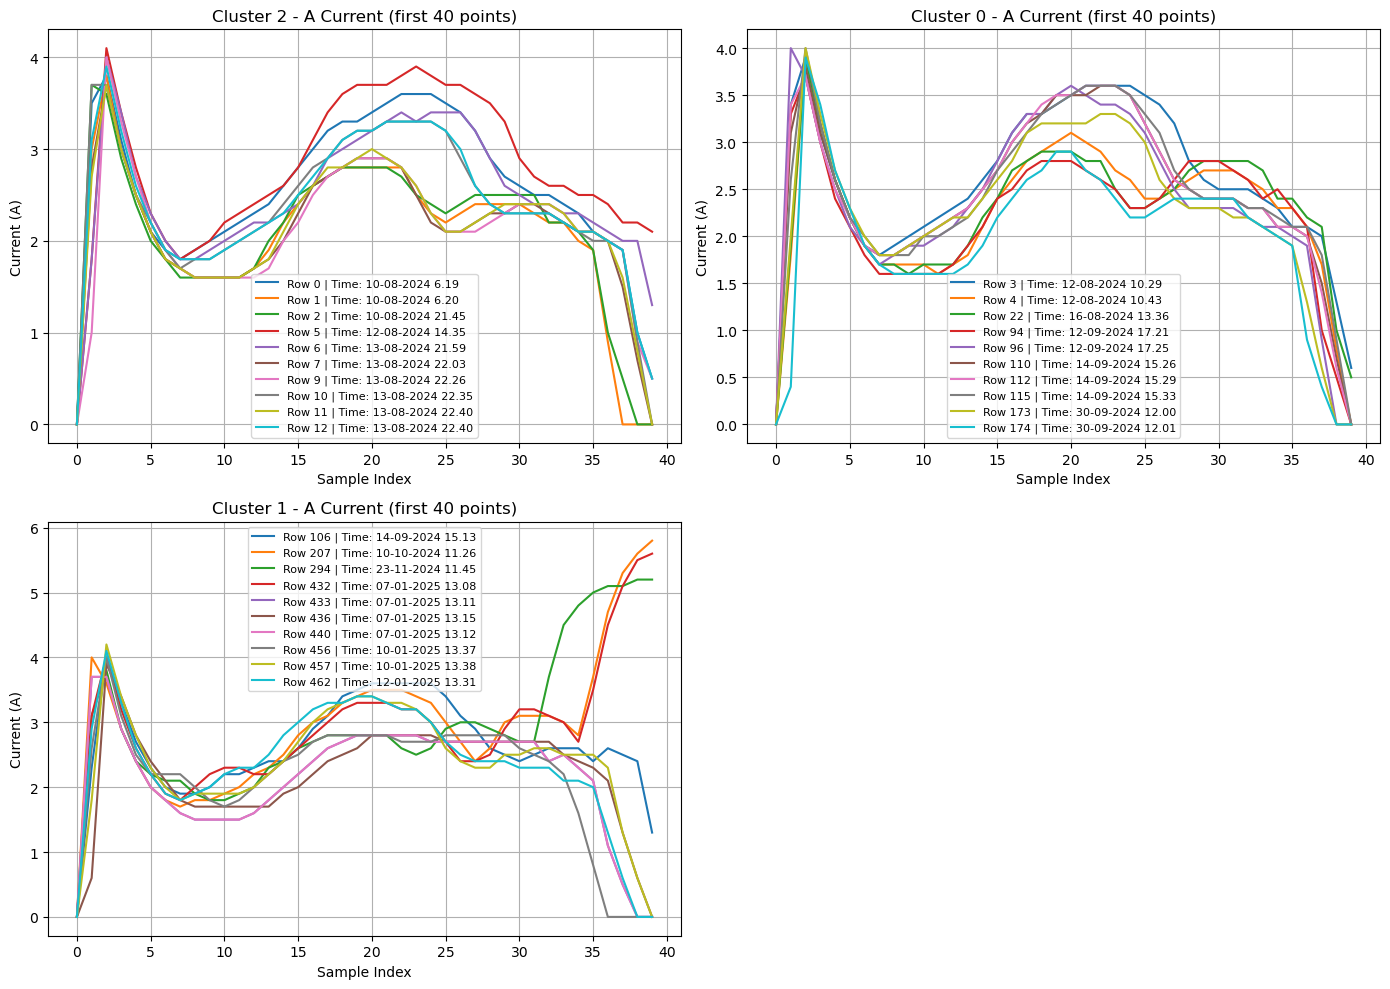

In [19]:
import matplotlib.pyplot as plt

# Set target length and samples per cluster
target_length = 40
samples_per_cluster = 10

# Get unique clusters (limit to 4 for 2x2 grid)
clusters = df_features['Cluster'].unique()[:4]

# Create 2x2 subplot grid
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.flatten()

# Loop through clusters and corresponding subplot axis
for i, cluster in enumerate(clusters):
    ax = axs[i]
    
    # Filter time series with at least 40 samples
    cluster_data = df_features[(df_features['Cluster'] == cluster) & 
                               (df_features['A Current'].apply(len) >= target_length)].head(samples_per_cluster)

    if cluster_data.empty:
        ax.set_title(f'Cluster {cluster} - No valid data')
        continue

    for idx, row in cluster_data.iterrows():
        current = row['A Current'][:target_length]
        label = f"Row {idx} | Time: {row['Time']}"
        ax.plot(current, label=label)

    ax.set_title(f'Cluster {cluster} - A Current (first {target_length} points)')
    ax.set_xlabel('Sample Index')
    ax.set_ylabel('Current (A)')
    ax.grid(True)
    ax.legend(fontsize=8)

# Hide unused subplots if any
for j in range(i+1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()


In [22]:
from scipy.stats import skew, kurtosis
import pandas as pd

# Create new columns for skewness and kurtosis
df_features['Skew_0_10'] = None
df_features['Kurt_0_10'] = None
df_features['Skew_10_40'] = None
df_features['Kurt_10_40'] = None

# Compute for each row
for idx, row in df_features.iterrows():
    current = row['A Current']

    if len(current) >= 40:
        seg_start = current[:10]
        seg_active = current[10:40]

        df_features.at[idx, 'Skew_0_10'] = skew(seg_start)
        df_features.at[idx, 'Kurt_0_10'] = kurtosis(seg_start)
        df_features.at[idx, 'Skew_10_40'] = skew(seg_active)
        df_features.at[idx, 'Kurt_10_40'] = kurtosis(seg_active)


In [25]:
df_features.head(1)

,Time,Site Name,Point Machine Name,Direction,A Current,A Voltage,B Current,B Voltage,Type of A,Type of B,...,B Voltage Max,B Voltage Min,B Voltage Range,B Voltage Start,B Voltage End,Cluster,Skew_0_10,Kurt_0_10,Skew_10_40,Kurt_10_40
0,10-08-2024 6.19,NALBARI,PT-101/102,Reverse,"[0.0, 3.5, 3.8, 3.1, 2.5, 2.1, 1.9, 1.8, 1.9, ...","[0.0, 18.0, 40.5, 73.5, 90.0, 97.5, 102.0, 103...","[0.0, 4.3, 4.1, 3.3, 2.7, 2.3, 2.0, 2.1, 2.2, ...","[0.0, 18.0, 25.5, 64.5, 85.5, 96.0, 100.5, 103...",TWS,TWS,...,103.5,0.0,103.5,0.0,0.0,2,-0.531356,0.239402,-0.948245,0.928888


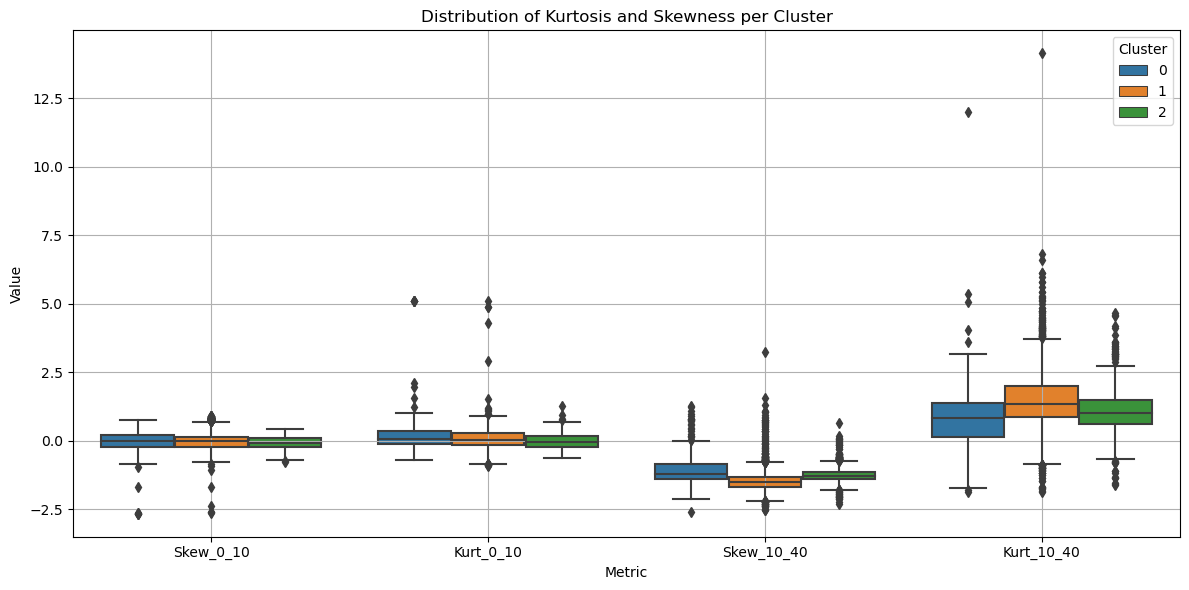

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Melt dataframe for seaborn
melted = df_features.melt(
    id_vars=['Cluster'],
    value_vars=['Skew_0_10', 'Kurt_0_10', 'Skew_10_40', 'Kurt_10_40'],
    var_name='Metric',
    value_name='Value'
)
# Drop rows with missing kurtosis/skewness values
melted = melted.dropna(subset=['Value'])

# Convert 'Value' column to numeric (if still object)
melted['Value'] = pd.to_numeric(melted['Value'], errors='coerce')


plt.figure(figsize=(12, 6))
sns.boxplot(x='Metric', y='Value', hue='Cluster', data=melted)
plt.title('Distribution of Kurtosis and Skewness per Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()


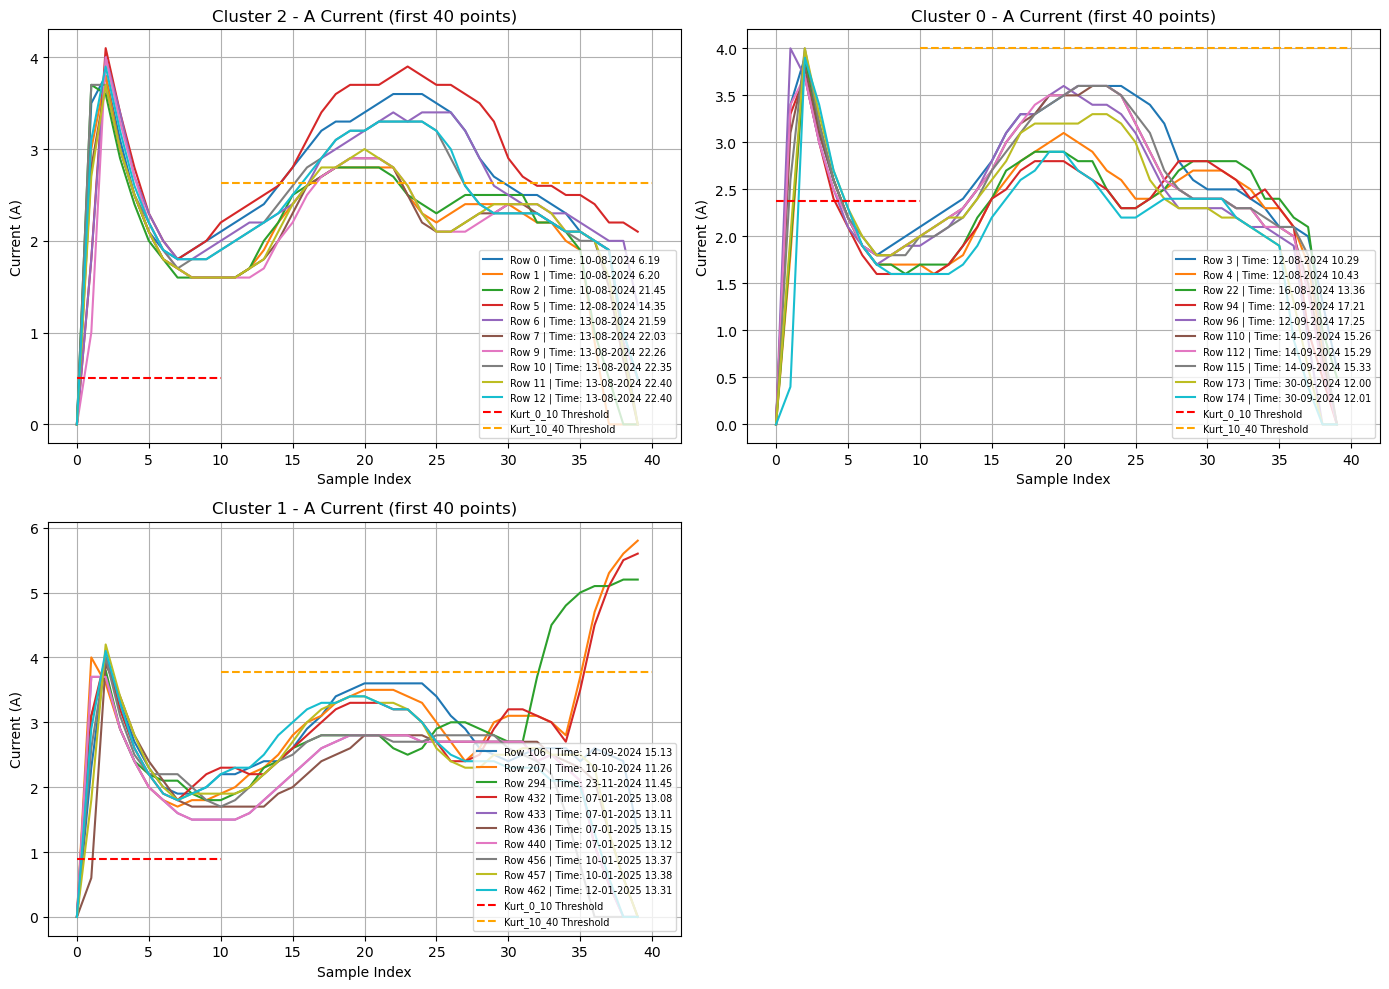

In [33]:
import matplotlib.pyplot as plt

# Get up to 4 unique clusters
clusters = df_features['Cluster'].unique()[:4]

# Create 2x2 subplot grid
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.flatten()

# Loop through clusters and corresponding subplot axes
for i, cluster_id in enumerate(clusters):
    ax = axs[i]

    # Filter valid rows (length ≥ 40)
    cluster_data = df_features[
        (df_features['Cluster'] == cluster_id) & 
        (df_features['A Current'].apply(len) >= 40)
    ].head(10)

    if cluster_data.empty:
        ax.set_title(f"Cluster {cluster_id} - No valid data")
        continue

    # Compute kurtosis thresholds
    kurt_0_10_thresh = (
        df_features[df_features['Cluster'] == cluster_id]['Kurt_0_10'].mean() +
        2 * df_features[df_features['Cluster'] == cluster_id]['Kurt_0_10'].std()
    )

    kurt_10_40_thresh = (
        df_features[df_features['Cluster'] == cluster_id]['Kurt_10_40'].mean() +
        2 * df_features[df_features['Cluster'] == cluster_id]['Kurt_10_40'].std()
    )

    # Plot current waveforms
    for idx, row in cluster_data.iterrows():
        current = row['A Current'][:40]
        label = f"Row {idx} | Time: {row['Time']}"
        ax.plot(current, label=label)

    # Plot threshold lines
    ax.hlines(kurt_0_10_thresh, xmin=0, xmax=10, colors='red', linestyles='--', label='Kurt_0_10 Threshold')
    ax.hlines(kurt_10_40_thresh, xmin=10, xmax=40, colors='orange', linestyles='--', label='Kurt_10_40 Threshold')

    ax.set_title(f'Cluster {cluster_id} - A Current (first 40 points)')
    ax.set_xlabel('Sample Index')
    ax.set_ylabel('Current (A)')
    ax.grid(True)
    ax.legend(fontsize=7, loc='lower right')

# Hide extra subplots if < 4 clusters
for j in range(i+1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()


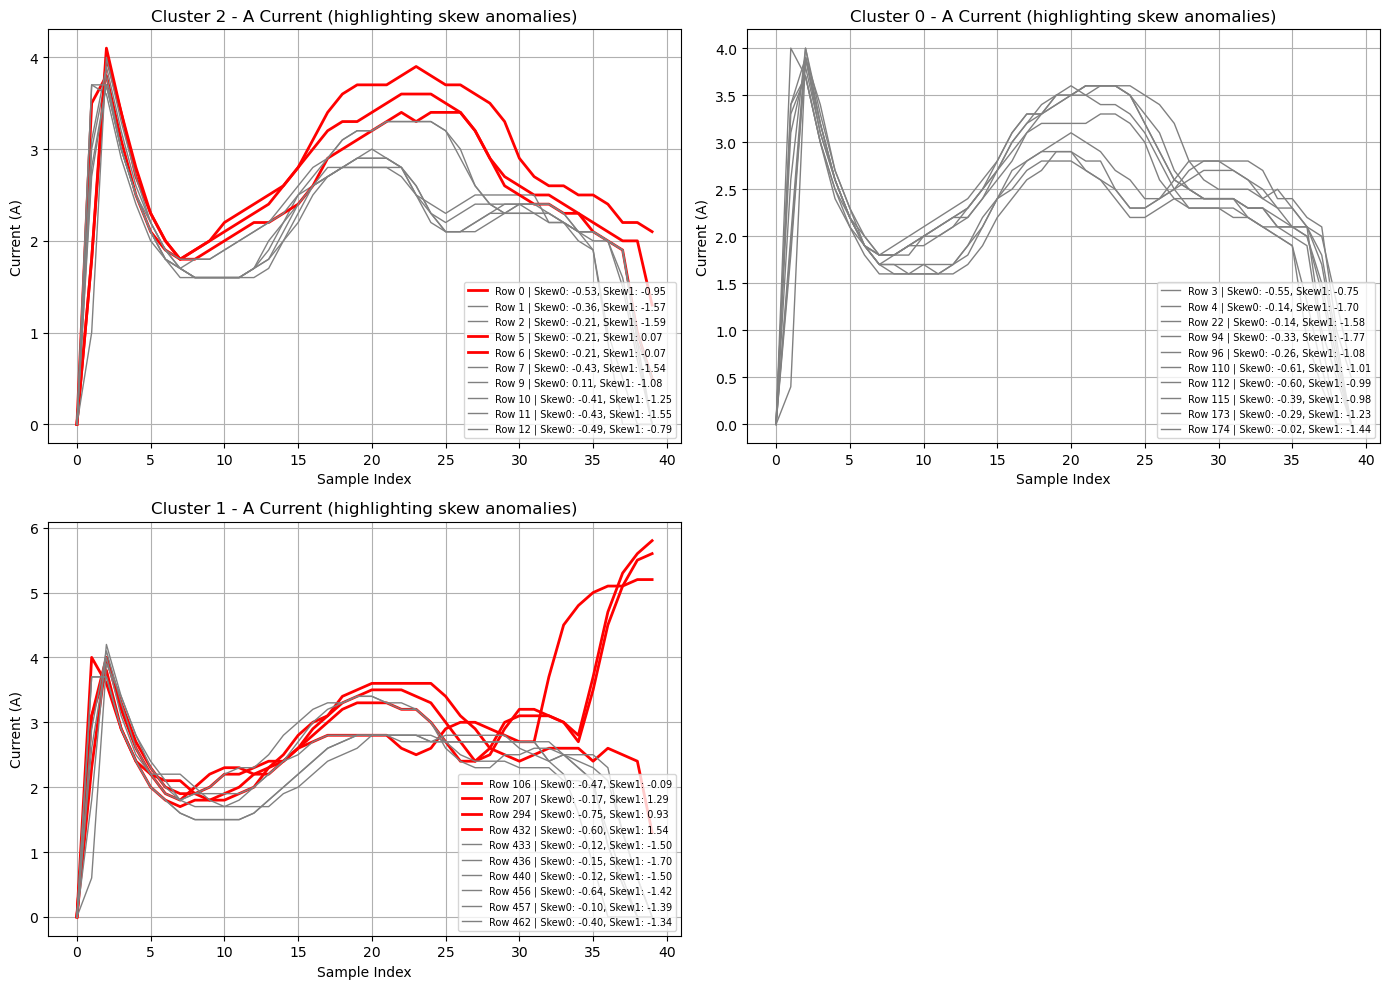

In [35]:
import matplotlib.pyplot as plt

# Define skew ranges
skew_metrics = {
    'Skew_0_10': '0–10',
    'Skew_10_40': '10–40'
}

# Compute skewness thresholds (upper & lower) per cluster
skew_thresh = {}
for metric in skew_metrics:
    stats = df_features.groupby('Cluster')[metric].agg(['mean', 'std'])
    skew_thresh[metric] = {
        'upper': stats['mean'] + 2 * stats['std'],
        'lower': stats['mean'] - 2 * stats['std']
    }

# Get unique clusters (limit to 4 for subplot grid)
clusters = df_features['Cluster'].unique()[:4]

# Create 2x2 subplot grid
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.flatten()

for i, cluster_id in enumerate(clusters):
    ax = axs[i]

    # Filter rows with A Current >= 40 points
    cluster_data = df_features[
        (df_features['Cluster'] == cluster_id) & 
        (df_features['A Current'].apply(len) >= 40)
    ].head(10)

    if cluster_data.empty:
        ax.set_title(f"Cluster {cluster_id} - No valid data")
        continue

    for idx, row in cluster_data.iterrows():
        current = row['A Current'][:40]

        # Check skewness thresholds
        skew0 = row['Skew_0_10']
        skew1 = row['Skew_10_40']
        u0 = skew_thresh['Skew_0_10']['upper'][cluster_id]
        l0 = skew_thresh['Skew_0_10']['lower'][cluster_id]
        u1 = skew_thresh['Skew_10_40']['upper'][cluster_id]
        l1 = skew_thresh['Skew_10_40']['lower'][cluster_id]

        is_anomalous = (skew0 < l0 or skew0 > u0) or (skew1 < l1 or skew1 > u1)
        color = 'red' if is_anomalous else 'gray'
        label = f"Row {idx} | Skew0: {skew0:.2f}, Skew1: {skew1:.2f}"
        ax.plot(current, color=color, label=label, linewidth=2 if is_anomalous else 1)

    ax.set_title(f'Cluster {cluster_id} - A Current (highlighting skew anomalies)')
    ax.set_xlabel('Sample Index')
    ax.set_ylabel('Current (A)')
    ax.grid(True)
    ax.legend(fontsize=7, loc='lower right')

# Hide unused subplots if fewer than 4 clusters
for j in range(i+1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()


In [47]:
import numpy as np
import pandas as pd

# Step 1: Compute cluster-level mean and std for kurtosis
cluster_stats = df_features.groupby('Cluster').agg({
    'Kurt_0_10': ['mean', 'std'],
    'Kurt_10_40': ['mean', 'std']
}).reset_index()

# Flatten column names
cluster_stats.columns = ['Cluster', 'Kurt_0_10_Mean', 'Kurt_0_10_Std', 'Kurt_10_40_Mean', 'Kurt_10_40_Std']

# Step 2: Merge stats back to main dataframe
df = pd.merge(df_features, cluster_stats, on='Cluster', how='left')

# Step 3: Define threshold (e.g., flag if > 2 std dev from mean)
threshold = 2

# Step 4: Create anomaly flags based on kurtosis deviation from cluster norms
df['Kurt_0_10_Anomaly_Cluster'] = (
    (df['Kurt_0_10'] - df['Kurt_0_10_Mean']).abs() > threshold * df['Kurt_0_10_Std']
)

df['Kurt_10_40_Anomaly_Cluster'] = (
    (df['Kurt_10_40'] - df['Kurt_10_40_Mean']).abs() > threshold * df['Kurt_10_40_Std']
)
df['Kurtosis_Shape_Anomaly'] = df['Kurt_0_10_Anomaly_Cluster'] | df['Kurt_10_40_Anomaly_Cluster']


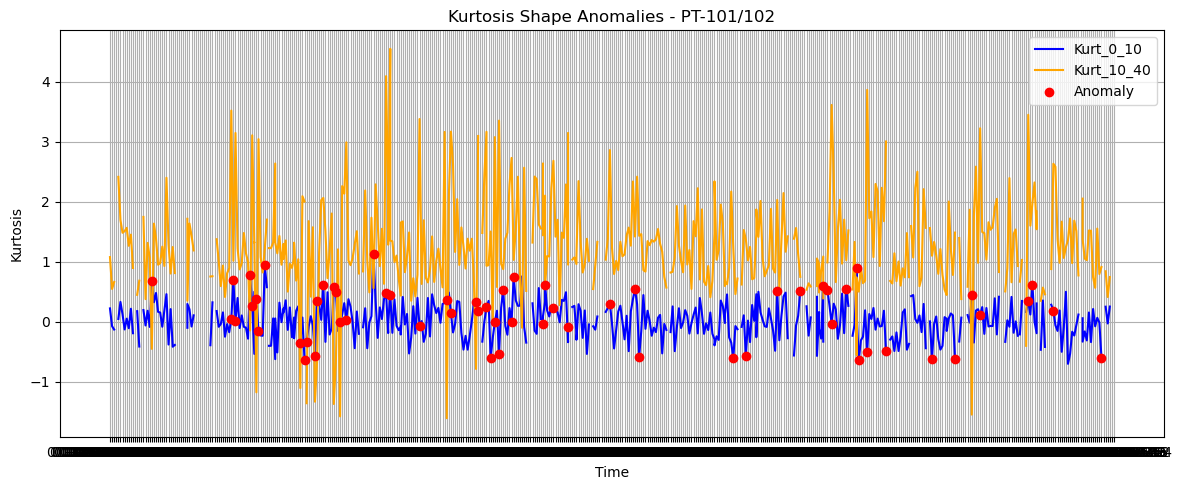

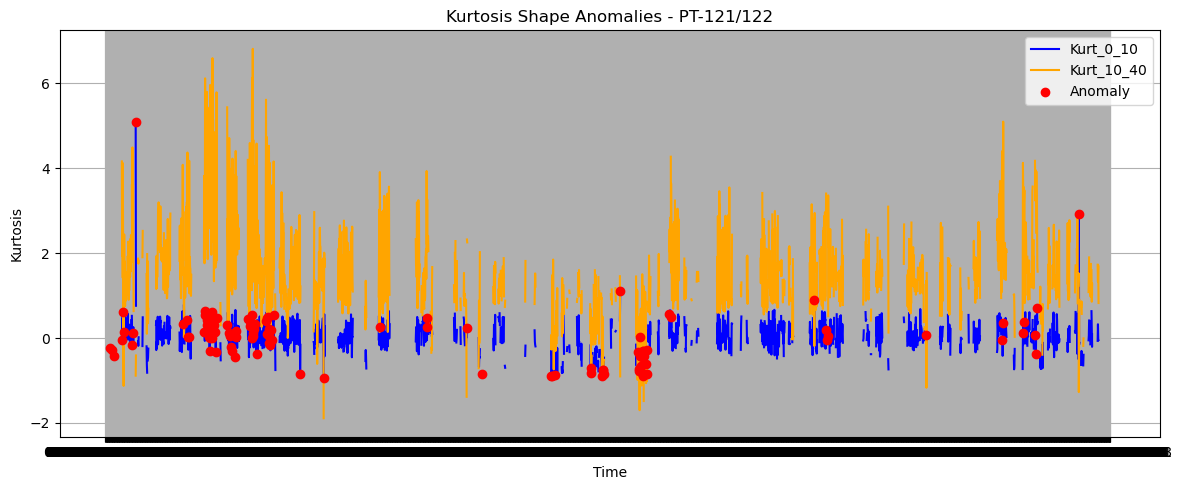

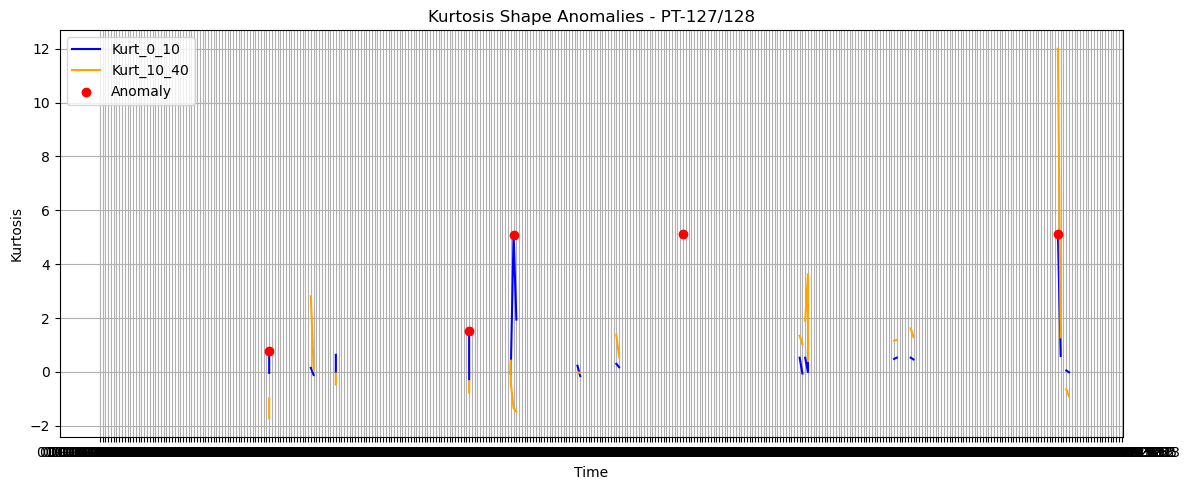

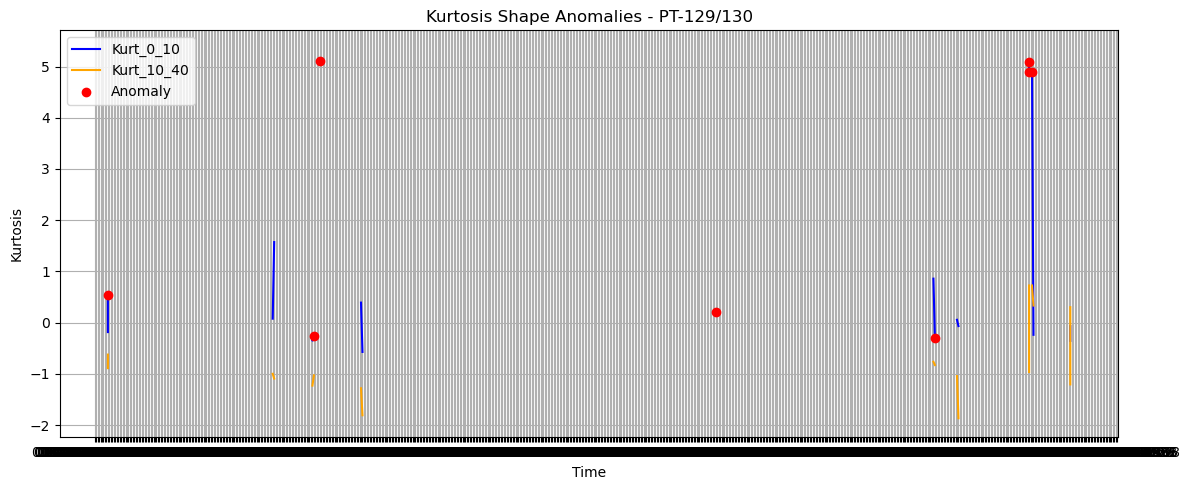

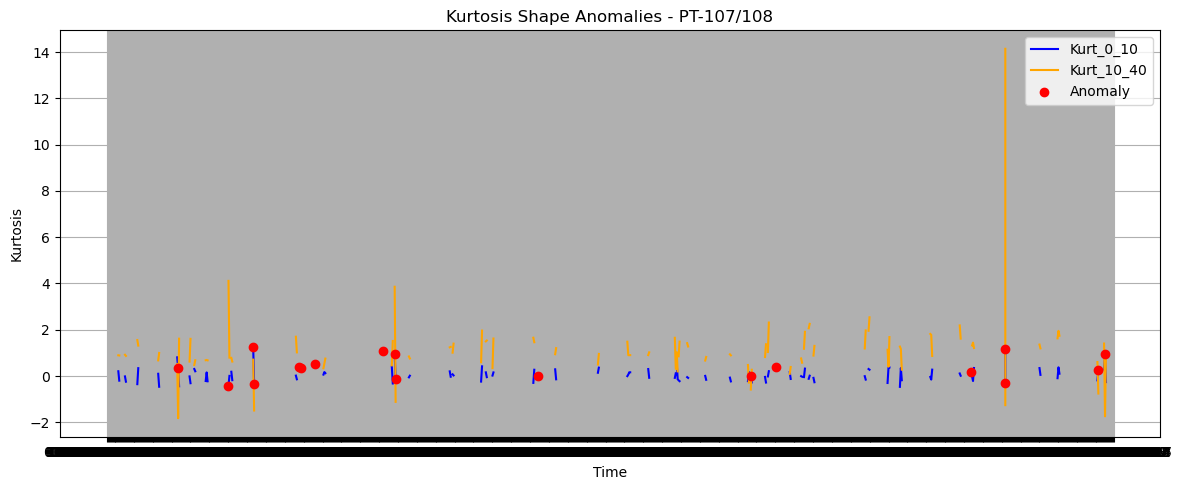

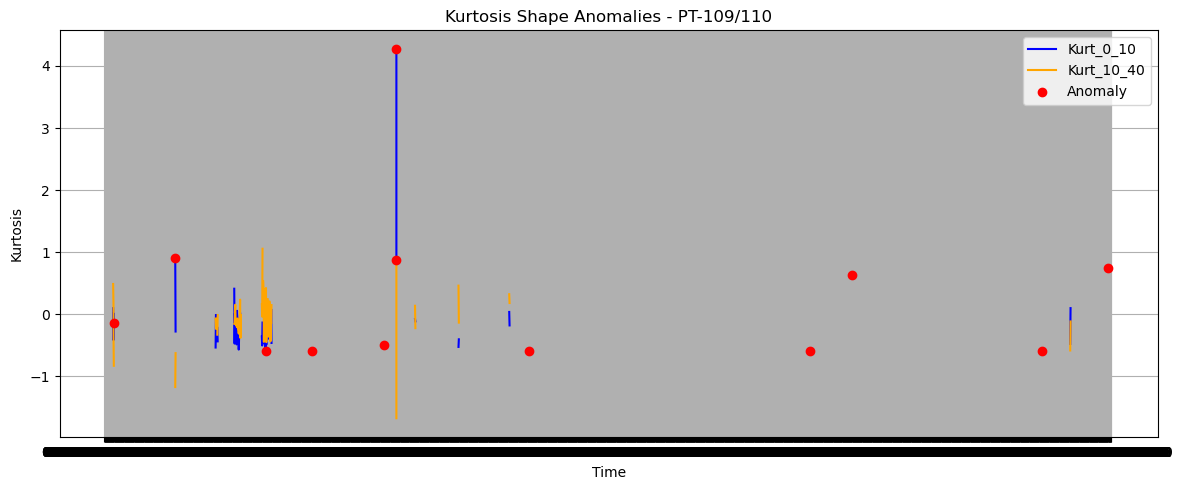

In [50]:
for machine in df['Point Machine Name'].unique():
    df_m = df[df['Point Machine Name'] == machine].sort_values('Time')

    if df_m.empty:
        continue

    plt.figure(figsize=(12, 5))
    plt.plot(df_m['Time'], df_m['Kurt_0_10'], label='Kurt_0_10', color='blue')
    plt.plot(df_m['Time'], df_m['Kurt_10_40'], label='Kurt_10_40', color='orange')

    # Highlight anomalies
    anomalies = df_m[df_m['Kurtosis_Shape_Anomaly']]
    plt.scatter(anomalies['Time'], anomalies['Kurt_0_10'], color='red', label='Anomaly', zorder=5)

    plt.title(f"Kurtosis Shape Anomalies - {machine}")
    plt.xlabel('Time')
    plt.ylabel('Kurtosis')
    plt.legend()
    plt.tight_layout()
    plt.grid(True)
    plt.show()


In [53]:
import pandas as pd

# Clean data: remove rows with missing kurtosis
df_clean = df.dropna(subset=['Kurt_0_10', 'Kurt_10_40']).copy()

# Calculate cluster-level stats
cluster_stats = df_clean.groupby('Cluster')[['Kurt_0_10', 'Kurt_10_40']].agg(['mean', 'std']).reset_index()
cluster_stats.columns = ['Cluster', 'Kurt_0_10_Mean', 'Kurt_0_10_Std', 'Kurt_10_40_Mean', 'Kurt_10_40_Std']

# Merge back
df_clean = df_clean.merge(cluster_stats, on='Cluster', how='left')

# Flag anomalies
threshold = 2
df_clean['Kurt_0_10_Anomaly'] = (df_clean['Kurt_0_10'] - df_clean['Kurt_0_10_Mean']).abs() > threshold * df_clean['Kurt_0_10_Std']
df_clean['Kurt_10_40_Anomaly'] = (df_clean['Kurt_10_40'] - df_clean['Kurt_10_40_Mean']).abs() > threshold * df_clean['Kurt_10_40_Std']
df_clean['Kurtosis_Shape_Anomaly'] = df_clean['Kurt_0_10_Anomaly'] | df_clean['Kurt_10_40_Anomaly']


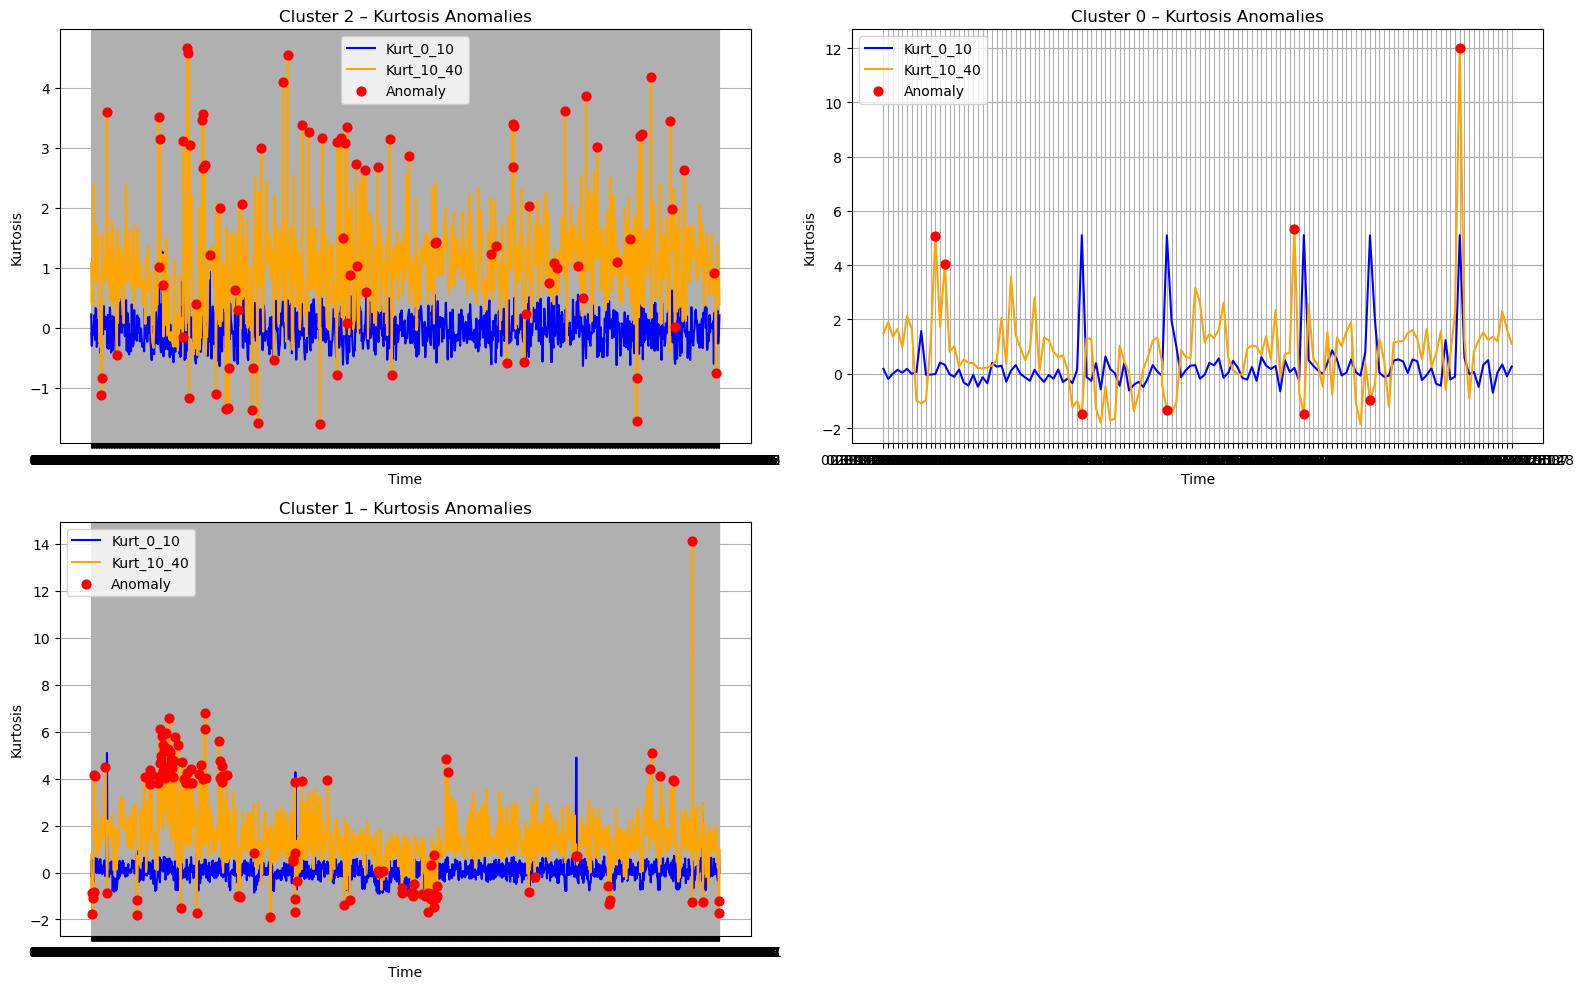

In [54]:
import matplotlib.pyplot as plt

clusters = df_clean['Cluster'].unique()[:4]
fig, axs = plt.subplots(2, 2, figsize=(16, 10))
axs = axs.flatten()

for i, cluster_id in enumerate(clusters):
    ax = axs[i]

    df_c = df_clean[df_clean['Cluster'] == cluster_id].sort_values('Time')

    if df_c.empty:
        ax.set_title(f"Cluster {cluster_id} - No Data")
        continue

    ax.plot(df_c['Time'], df_c['Kurt_0_10'], label='Kurt_0_10', color='blue')
    ax.plot(df_c['Time'], df_c['Kurt_10_40'], label='Kurt_10_40', color='orange')

    anomalies = df_c[df_c['Kurtosis_Shape_Anomaly']]
    ax.scatter(anomalies['Time'], anomalies['Kurt_10_40'], color='red', s=40, zorder=5, label='Anomaly')

    ax.set_title(f"Cluster {cluster_id} – Kurtosis Anomalies")
    ax.set_xlabel("Time")
    ax.set_ylabel("Kurtosis")
    ax.legend()
    ax.grid(True)

# Hide any unused subplots
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()


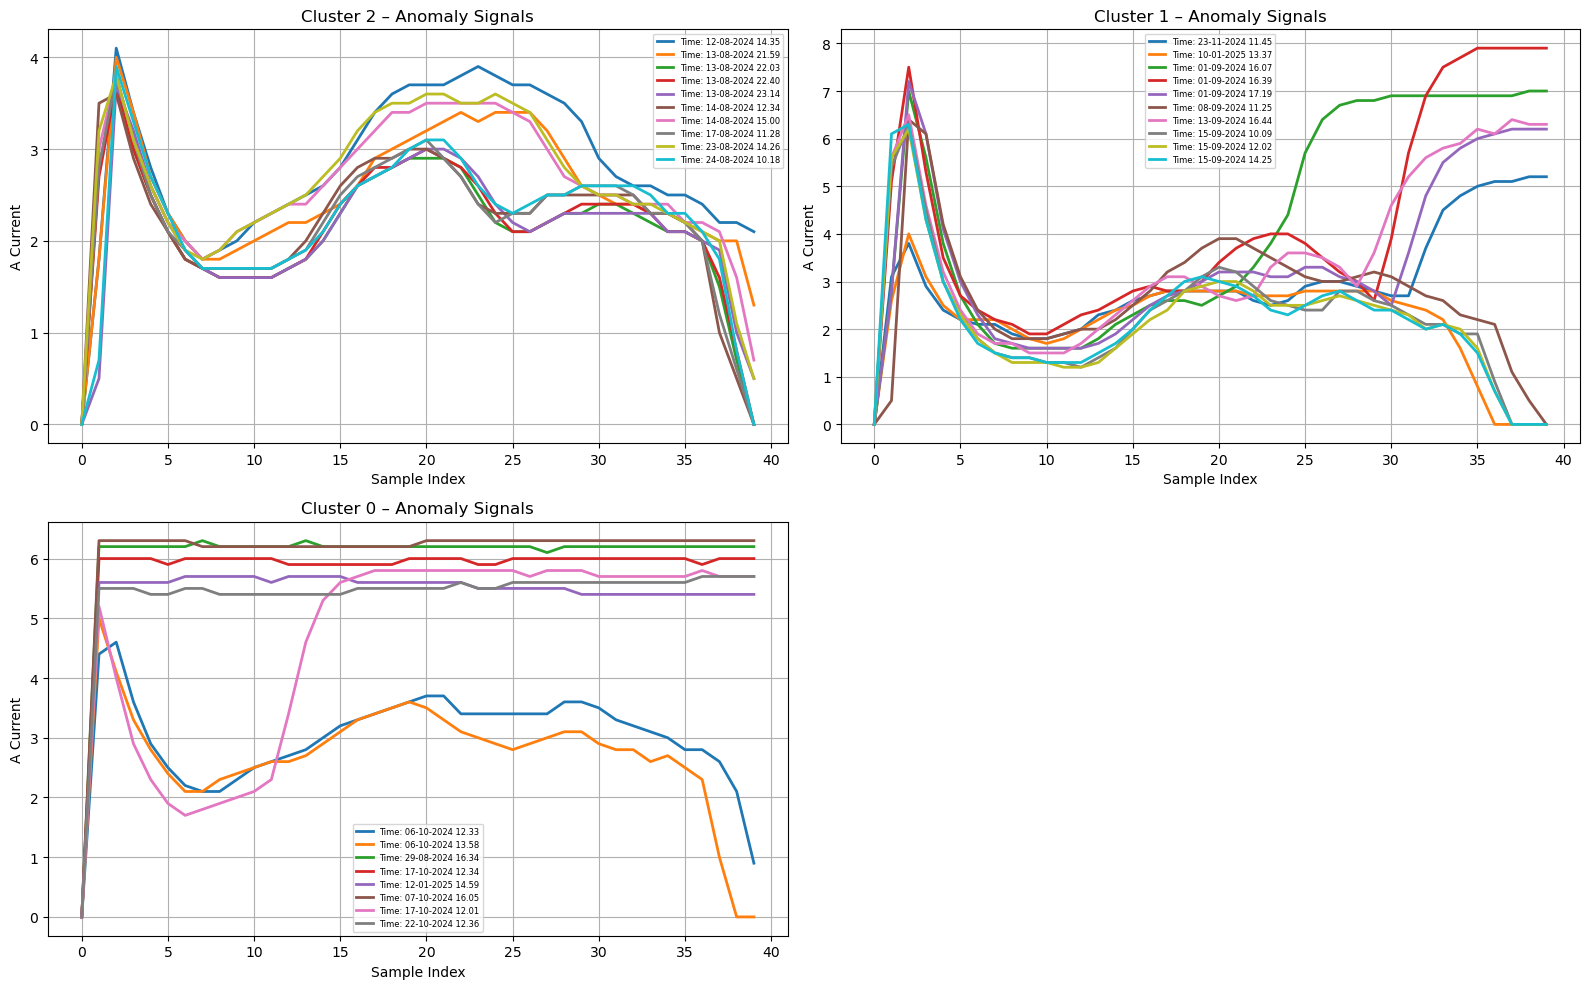

In [55]:
import matplotlib.pyplot as plt

# Ensure data is sorted and cleaned
df_anomaly = df_clean[df_clean['Kurtosis_Shape_Anomaly'] & df_clean['A Current'].apply(lambda x: isinstance(x, list) and len(x) >= 40)]

# Get up to 4 unique clusters
clusters = df_anomaly['Cluster'].unique()[:4]

# Create 2×2 subplot grid
fig, axs = plt.subplots(2, 2, figsize=(16, 10))
axs = axs.flatten()

for i, cluster_id in enumerate(clusters):
    ax = axs[i]
    
    cluster_anomalies = df_anomaly[df_anomaly['Cluster'] == cluster_id].head(10)  # show first 10

    if cluster_anomalies.empty:
        ax.set_title(f"Cluster {cluster_id} – No Anomalies")
        continue

    for idx, row in cluster_anomalies.iterrows():
        current = row['A Current'][:40]
        ax.plot(current, label=f"Time: {row['Time']}", linewidth=2)

    ax.set_title(f"Cluster {cluster_id} – Anomaly Signals")
    ax.set_xlabel("Sample Index")
    ax.set_ylabel("A Current")
    ax.grid(True)
    ax.legend(fontsize=6)

# Hide extra axes if < 4 clusters
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()


/var/folders/lj/s2tb9t7518n0pd09r0x4qtzm0000gn/T/ipykernel_10630/2205404605.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered = cluster_df[
/var/folders/lj/s2tb9t7518n0pd09r0x4qtzm0000gn/T/ipykernel_10630/2205404605.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered = cluster_df[
/var/folders/lj/s2tb9t7518n0pd09r0x4qtzm0000gn/T/ipykernel_10630/2205404605.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered = cluster_df[


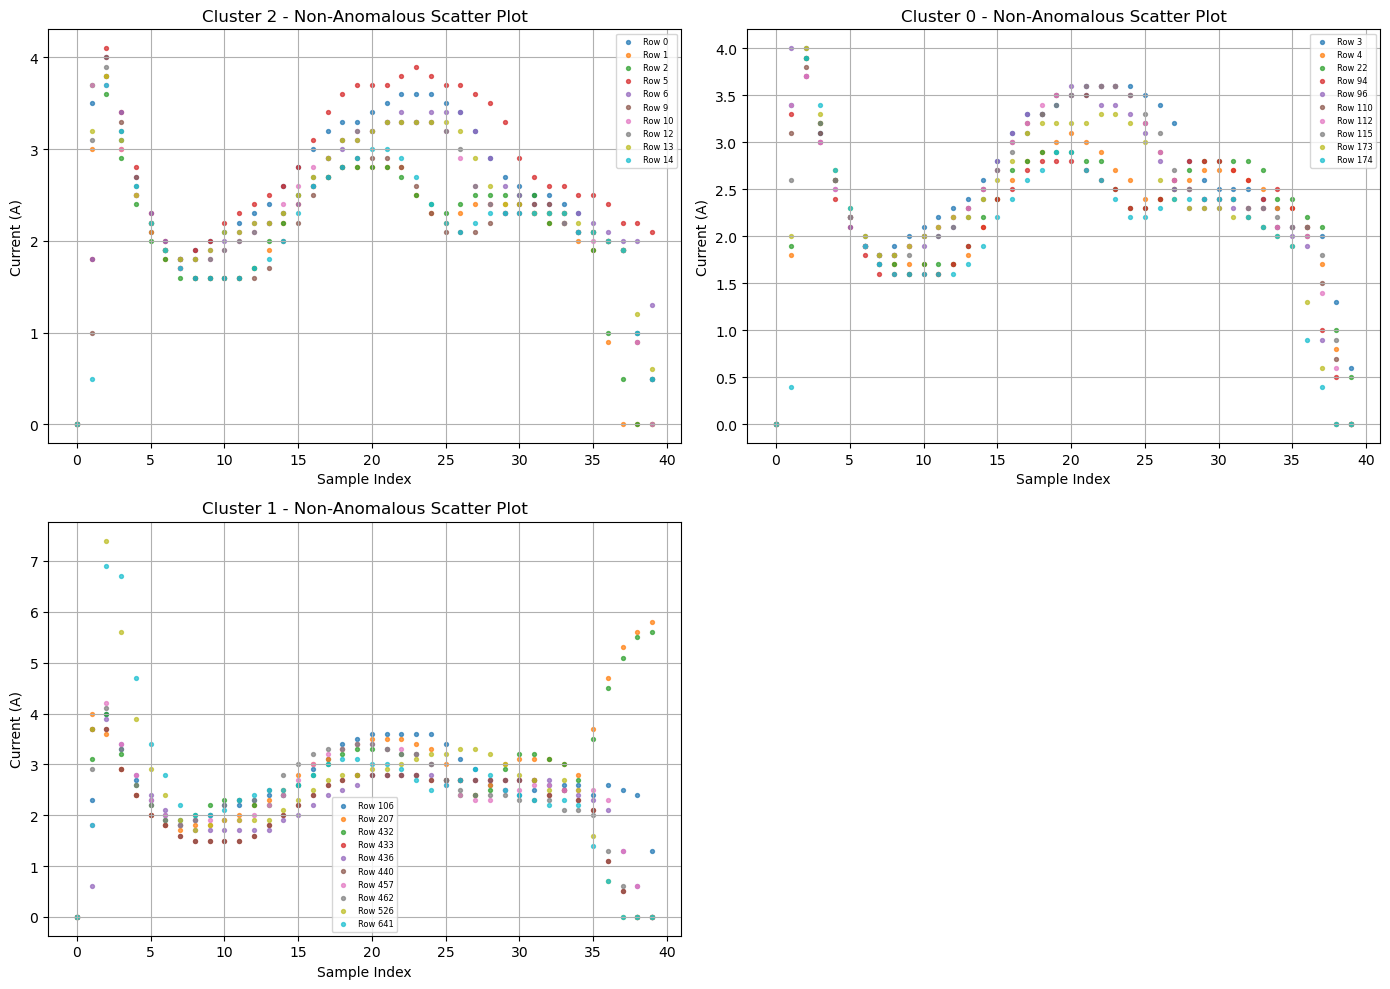

In [57]:
import matplotlib.pyplot as plt
import numpy as np

# Get first 4 unique clusters
clusters = df_features['Cluster'].unique()[:4]

# Create 2x2 subplot grid
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.flatten()

for i, cluster_id in enumerate(clusters):
    ax = axs[i]

    # Filter by cluster
    cluster_df = df_features[df_features['Cluster'] == cluster_id]

    # Compute kurtosis thresholds
    kurt_0_10_thresh = cluster_df['Kurt_0_10'].mean() + 2 * cluster_df['Kurt_0_10'].std()
    kurt_10_40_thresh = cluster_df['Kurt_10_40'].mean() + 2 * cluster_df['Kurt_10_40'].std()

    # Get only non-anomalous and valid-length signals
    filtered = cluster_df[
        (df_features['A Current'].apply(len) >= 40) &
        (cluster_df['Kurt_0_10'] <= kurt_0_10_thresh) &
        (cluster_df['Kurt_10_40'] <= kurt_10_40_thresh)
    ].head(10)

    if filtered.empty:
        ax.set_title(f'Cluster {cluster_id} - No valid signals')
        ax.axis('off')
        continue

    # Plot each signal as scatter
    for idx, row in filtered.iterrows():
        y = np.array(row['A Current'][:40])
        x = np.arange(len(y))
        ax.scatter(x, y, s=8, alpha=0.7, label=f'Row {idx}')

    ax.set_title(f'Cluster {cluster_id} - Non-Anomalous Scatter Plot')
    ax.set_xlabel('Sample Index')
    ax.set_ylabel('Current (A)')
    ax.grid(True)
    ax.legend(fontsize=6, loc='best')

# Hide any extra subplots if less than 4 clusters
for j in range(i+1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()


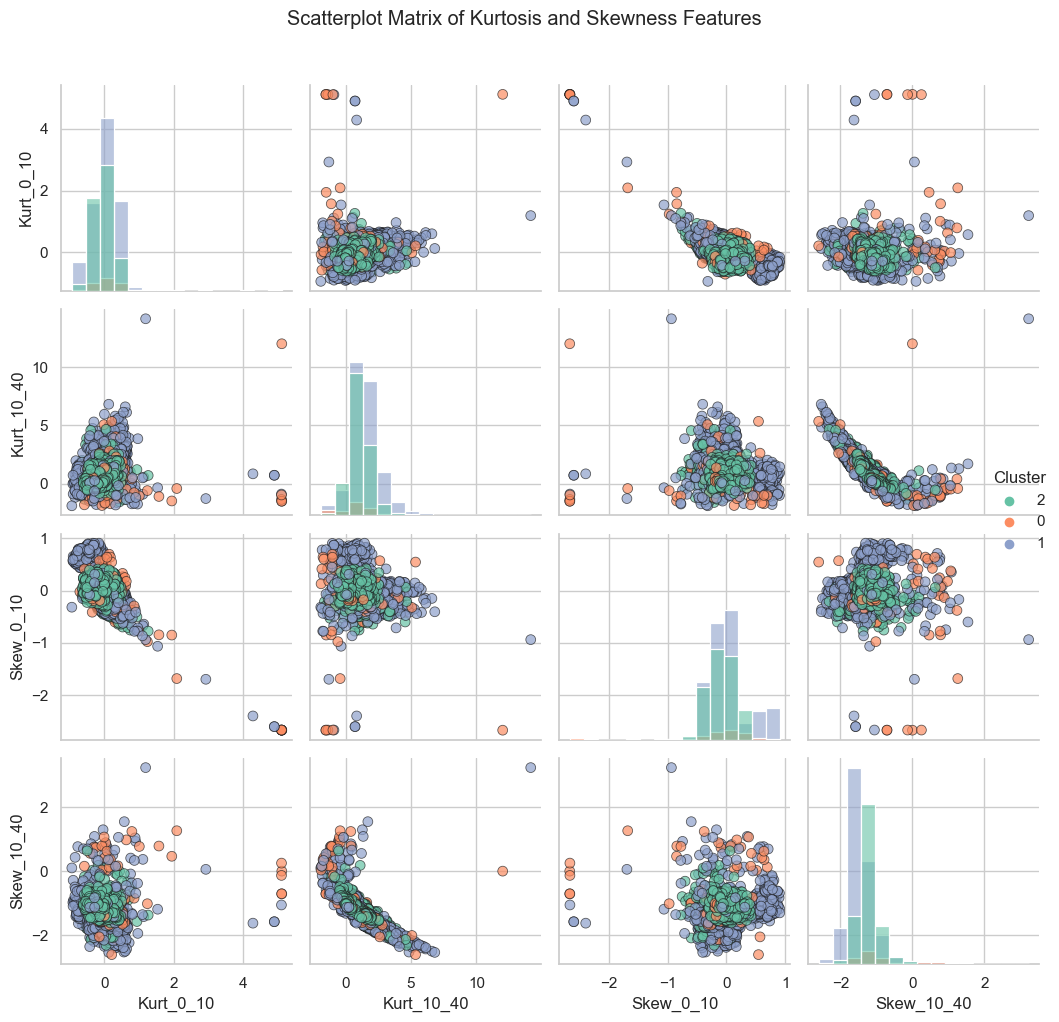

In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select the desired features
metrics = ['Kurt_0_10', 'Kurt_10_40', 'Skew_0_10', 'Skew_10_40']

# Drop rows with NaNs in metrics or missing cluster info
plot_df = df_features.dropna(subset=metrics + ['Cluster']).copy()

# Ensure Cluster is treated as a categorical variable (for colored hue)
plot_df['Cluster'] = plot_df['Cluster'].astype(str)

# Set Seaborn style
sns.set(style="whitegrid", context='notebook')

# Create pairplot
g = sns.pairplot(
    plot_df[metrics + ['Cluster']],
    hue='Cluster',
    palette='Set2',
    diag_kind='hist',       # histogram on diagonal
    kind='scatter',         # scatter plot in off-diagonal
    plot_kws={'alpha': 0.7, 's': 50, 'edgecolor': 'k'},
    diag_kws={'bins': 15, 'alpha': 0.6},
    corner=False            # Show full matrix
)

# Add a title
g.fig.suptitle("Scatterplot Matrix of Kurtosis and Skewness Features", y=1.02)

# Improve layout
plt.tight_layout()
plt.show()
